<a href="https://colab.research.google.com/github/khanhthanhh9/Deep-Learning-Model/blob/main/Songs_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 12.8MB/s 
     |████████████████████████████████| 204kB 20.7MB/s 
     |████████████████████████████████| 1.2MB 41.1MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
# key = os.environ.get('AZURE_SEARCH_KEY', '455fc18d0b0c42b384ee21cabcc4dc31')

In [ ]:
# results = search_images_bing(key, 'Vietnam Women')
# ims = results.attrgot('contentUrl')
# len(ims)

In [ ]:
# doc(L.attrgot)

In [ ]:
# import os
# p = r"gdrive/MyDrive/ColabNotebooks/images"

# cwd = os.getcwd()  # Get the current working directory (cwd)
# files = os.listdir(p)  # Get all the files in that directory
# print("Files in %r: %s" % (p, files))

In [ ]:
song_types = 'pop','rockalt','jazz'
# path = untar_data()
path = '/content/gdrive/MyDrive/ColabNotebooks/images/music'
# 
# print(os.listdir(os.getcwd() + path))
path = Path(path)
# Path.exists(path)

In [ ]:
# path = untar_data(URLs.PETS)/'images'

# print(path)

In [ ]:
# ??Path

In [ ]:
# import os
# print(os.listdir('content'))

In [ ]:
# if not path.exists():
#     path.mkdir()
#     for o in song_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         # results = search_images_bing(key, f'{o} women')
#         # download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
# Path.cwd()

In [ ]:
# fns = get_image_files(path)
# fns

In [ ]:
# failed = verify_images(fns)
# failed

In [ ]:
# failed.map(Path.unlink);

In [ ]:
song_png = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=None)

In [ ]:
dls = song_png.dataloaders(path)

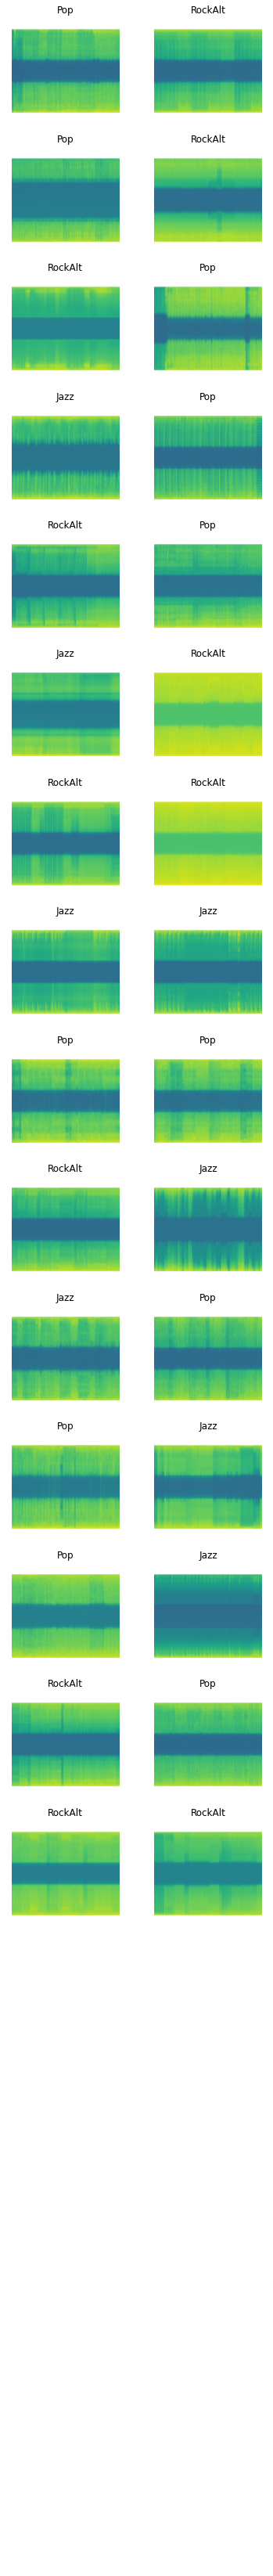

In [ ]:
dls.valid.show_batch(max_n=80, nrows=20)

In [ ]:
song_png = song_png.new(item_tfms=RandomResizedCrop(224, min_scale=0.9999), batch_tfms= None)
dls = song_png.dataloaders(path)

In [ ]:
# song_png = song_png.new(
#   item_tfms=)
# dls = song_png.dataloaders(path)

# 

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.102744,2.574486,0.633333,00:08


epoch,train_loss,valid_loss,error_rate,time
0,2.116848,1.874989,0.633333,00:08
1,1.733561,1.396621,0.633333,00:08
2,1.399144,1.045045,0.466667,00:08
3,1.129450,0.856024,0.433333,00:08
4,0.974737,0.794194,0.400000,00:08
5,0.849945,0.833145,0.400000,00:08
6,0.736310,0.944628,0.466667,00:08
7,0.653911,1.033039,0.433333,00:08


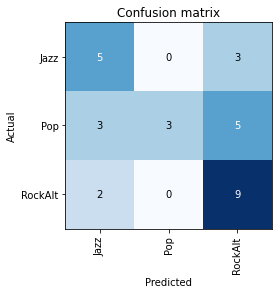

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

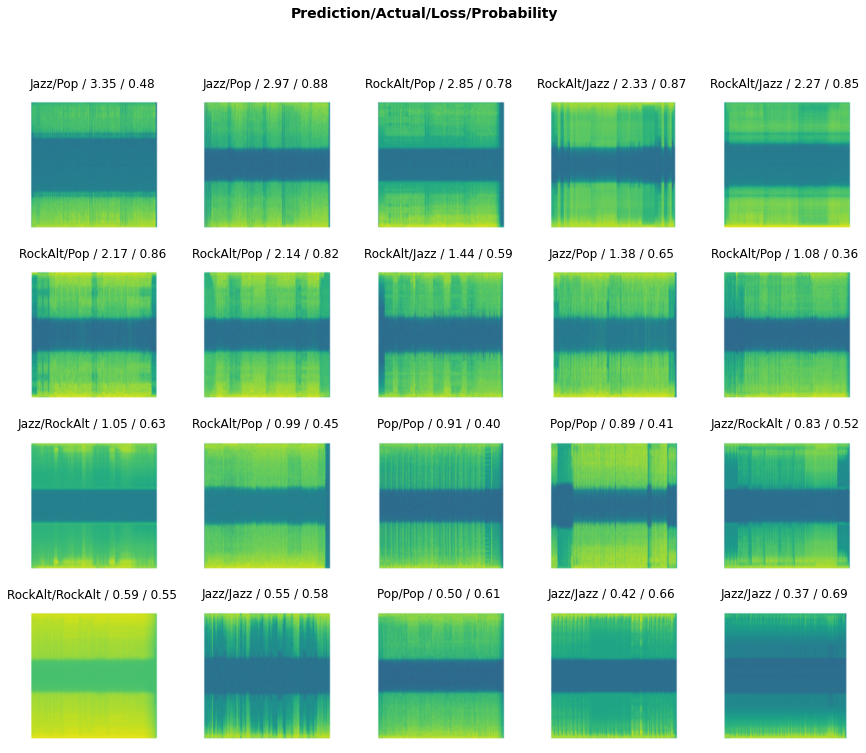

In [ ]:
interp.plot_top_losses(20, nrows=4)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()


In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    


In [ ]:
btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your grill!'), 
      btn_upload, btn_run, out_pl, lbl_pred])